In [18]:
import glob
import pandas as pd
from pathlib import Path  
import numpy as np
# import geopandas as gpd

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

non_ripa_df = pd.read_csv('C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\Berkeley_PD_-_Stop_Data__Jan_26__2015_to_Sep_30__2020_.csv',keep_default_na=True)
ripa_df = pd.read_csv('C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\Berkeley_PD_-_Stop_Data__October_1__2020_-_Present.csv',keep_default_na=True)

# non_ripa_df.shape
# non_ripa_df.head(5)

# ripa_df.shape
# ripa_df.head(5)

# Re-formatting columns

In [324]:
non_ripa_df.columns.values
ripa_df.columns.values

array(['CreateDatetime', 'IncidentNumber', 'Address', 'City', 'Lat',
       'Lon', 'CallType', 'Race', 'Gender', 'Age', 'Reason',
       'Enforcement', 'Car Search'], dtype=object)

array(['LEA Record ID', 'Person Number', 'Date of Stop', 'Time of Stop',
       'Duration of Stop', 'Is Stop Made in Response to Call for Service',
       'Information Based Stop', 'Type Of Stop',
       'Officer Type of Assignment', 'Location', 'City',
       'Is Location a K12 Public School',
       'If K12 School Is Stop of a Student', 'School Name',
       'Education Code Section', 'Education Code Subdivision',
       'Race Perceived Prior To Stop', 'Perceived Race or Ethnicity',
       'Perceived Gender', 'Perceived Gender Nonconforming', 'Is LGBT',
       'Perceived Age', 'Person had Limited or No English Fluency',
       'Perceived or Known Disability', 'City of Residence',
       'Reason for Stop', 'Reason for Stop Narrative',
       'Traffic Violation Type', 'Traffic Violation Offense Codes',
       'Suspicion Offense Code', 'Suspicion SubType', 'Actions Taken',
       'Basis for Search', 'Basis for Search Narrative',
       'Basis for Property Seizure', 'Type of Property Seiz

Let's address the columns from non-ripa that just need to be re-named. 

In [325]:
non_ripa_df = non_ripa_df.rename(columns={'Lat':'LAT', 
                                          'Lon':'LONG',
                                          'Race':'Perceived Race or Ethnicity',
                                          'Gender':'Perceived Gender',
                                          'Age':'Perceived Age',
                                          'Reason':'Reason for Stop',
                                          'Enforcement':'Result of Stop'})

And quickly address the different date formatting...

In [326]:
non_ripa_df['CreateDatetime'] = pd.to_datetime(non_ripa_df.CreateDatetime)
non_ripa_df['Date of Stop'] = non_ripa_df['CreateDatetime'].dt.date
non_ripa_df['Time of Stop'] = non_ripa_df['CreateDatetime'].dt.time
non_ripa_df = non_ripa_df.drop(columns = ['CreateDatetime'])
non_ripa_df.columns.unique


<bound method Index.unique of Index(['IncidentNumber', 'Address', 'City', 'LAT', 'LONG', 'CallType',
       'Perceived Race or Ethnicity', 'Perceived Gender', 'Perceived Age',
       'Reason for Stop', 'Result of Stop', 'Car Search', 'Date of Stop',
       'Time of Stop'],
      dtype='object')>

In [327]:
all_stops = pd.concat([ripa_df,non_ripa_df], axis=0)
all_stops['Date of Stop']= pd.to_datetime(all_stops['Date of Stop'])

all_stops = all_stops.reindex(columns=[ 'LEA Record ID', 'Incident Number', 'Date of Stop',
                                        'Time of Stop', 'Duration of Stop', 'City',
                                        'LAT', 'LONG', 'Race Perceived Prior To Stop',
                                        'Perceived Race or Ethnicity', 'Perceived Gender',
                                        'Perceived Age', 'Reason for Stop', 
                                        'Reason for Stop Narrative', 'Result of Stop', 'Person Number',  'Is Stop Made in Response to Call for Service',
                                        'Information Based Stop', 'Type Of Stop', 'Officer Type of Assignment',
                                        'Location', 'Is Location a K12 Public School',
                                        'If K12 School Is Stop of a Student', 'School Name',
                                        'Education Code Section', 'Education Code Subdivision',
                                        'Perceived Gender Nonconforming', 'Is LGBT',
                                        'Person had Limited or No English Fluency',
                                        'Perceived or Known Disability', 'City of Residence', 'Traffic Violation Type',
                                        'Traffic Violation Offense Codes', 'Suspicion Offense Code',
                                        'Suspicion SubType', 'Actions Taken', 'Basis for Search',
                                        'Basis for Search Narrative', 'Basis for Property Seizure',
                                        'Type of Property Seized', 'Contraband or Evidence',
                                        'Other Contraband Desc', 'Warning Offense Codes',
                                        'Citation Offense Codes',
                                        'In field cite and release Offense Codes',
                                        'Custodial arrest Offense Codes', 'IncidentNumber',
                                        'Address', 'CallType', 'Car Search'
                                      ])

all_stops.columns.unique

<bound method Index.unique of Index(['LEA Record ID', 'Incident Number', 'Date of Stop', 'Time of Stop',
       'Duration of Stop', 'City', 'LAT', 'LONG',
       'Race Perceived Prior To Stop', 'Perceived Race or Ethnicity',
       'Perceived Gender', 'Perceived Age', 'Reason for Stop',
       'Reason for Stop Narrative', 'Result of Stop', 'Person Number',
       'Is Stop Made in Response to Call for Service',
       'Information Based Stop', 'Type Of Stop', 'Officer Type of Assignment',
       'Location', 'Is Location a K12 Public School',
       'If K12 School Is Stop of a Student', 'School Name',
       'Education Code Section', 'Education Code Subdivision',
       'Perceived Gender Nonconforming', 'Is LGBT',
       'Person had Limited or No English Fluency',
       'Perceived or Known Disability', 'City of Residence',
       'Traffic Violation Type', 'Traffic Violation Offense Codes',
       'Suspicion Offense Code', 'Suspicion SubType', 'Actions Taken',
       'Basis for Search', 

In [ ]:
all_stops.columns.unique
all_stops['City'].unique()


In [395]:
filepath = Path('C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\All_Stops_WOW2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
all_stops.to_csv(filepath, na_rep='')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\All_Stops_WOW2.csv'

In [ ]:
all_stops_small_copy['LONG'][1]

In [392]:
import censusgeocode as cg 
result = cg.coordinates(x=all_stops['LONG'][1], y=all_stops['LAT'][1])
result

result2 = cg.coordinates(x=all_stops['LONG'][2], y=all_stops['LAT'][2])

{'2018 State Legislative Districts - Upper': [{'GEOID': '06009',
   'CENTLAT': '+37.8692954',
   'AREAWATER': 252975024,
   'STATE': '06',
   'BASENAME': '9',
   'OID': '212904690192874',
   'SLDU': '009',
   'LSADC': 'LU',
   'FUNCSTAT': 'N',
   'INTPTLAT': '+37.8695634',
   'NAME': 'State Senate District 9',
   'OBJECTID': 974,
   'CENTLON': '-122.2639442',
   'LSY': '2018',
   'AREALAND': 512851531,
   'INTPTLON': '-122.2625626',
   'MTFCC': 'G5210',
   'LDTYP': 'O',
   'CENT': (-122.2639442, 37.8692954),
   'INTPT': (-122.2625626, 37.8695634)}],
 'States': [{'STATENS': '01779778',
   'GEOID': '06',
   'CENTLAT': '+37.1547578',
   'AREAWATER': 20294856460,
   'STATE': '06',
   'BASENAME': 'California',
   'STUSAB': 'CA',
   'OID': '2749018475066',
   'LSADC': '00',
   'FUNCSTAT': 'A',
   'INTPTLAT': '+37.1551773',
   'DIVISION': '9',
   'NAME': 'California',
   'REGION': '4',
   'OBJECTID': 14,
   'CENTLON': '-119.5277715',
   'AREALAND': 403670473404,
   'INTPTLON': '-119.5434183',

In [393]:
result['2020 Census Blocks'][0]['TRACT']

'424002'

In [72]:
result_tract = str(result['2020 Census Blocks'][0]['TRACT'])
result_tract = result_tract[:4] + '.' + result_tract[4:]
result_tract

# result2['2020 Census Blocks'][0]['TRACT']
# result_tract2 = int(int(result2['2020 Census Blocks'][0]['TRACT'])/100)
# result_tract2
# len(str(result_tract2))

'4240.02'

In [219]:
def tract_finder(i):
    result = cg.coordinates(x=all_stops_small_copy['LONG'][i], y=all_stops_small_copy['LAT'][i])
    result_tract = str(result['2020 Census Blocks'][0]['TRACT'])
    result_tract = result_tract[:4] + '.' + result_tract[4:]
    return result_tract

In [220]:
tract_finder(2)

'4232.00'

In [63]:
all_stops['Census Tract'] = ''

In [111]:
times_to_it = len(all_stops_small_copy.index)
y = 0

tract_list = []
for i in range(times_to_it):
    tract = tract_finder(i)
    tract_list.append(tract)
    y = y + 1
tract_list

# all_stops_small_copy['Census Tract'] = tract_arr.tolist()

KeyboardInterrupt: 

In [81]:
print(y,'rows worth of tracts takes approximately 33 seconds! To do this for the full dataset, it would take', (((33/20)*65500)/60), 'minutes, or', ((((33/20)*65500)/60)/60), 'hours!')

20 rows worth of tracts takes approximately 33 seconds! To do this for the full dataset, it would take 1801.25 minutes, or 30.020833333333332 hours!


In [85]:
(2*65500)/60

2183.3333333333335

In [396]:
# from geopy.distance import geodesic
all_stops = pd.read_csv('C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\All_Stops_WOW.csv',keep_default_na=True)

C:\Users\kharr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,9,14,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [248]:
from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).miles)


538.3904453677205


In [376]:
# %%timeit
# all_stops_small_copy = all_stops.head(8400)


# times_to_it = len(all_stops_small_copy.index)


i = 0
distance_list = []
uni_coords = (37.8719,122.2585)

for i in range(64429):
    long_1 = all_stops['LAT'][i]
    lat_1 = (all_stops['LONG'][i])*-1
    stop_coords = (long_1,lat_1)
    distance = (geodesic(stop_coords, uni_coords).miles)
#     y = y + 1
    distance_list.append(distance)
    if i >= 64420:
        print('debug', (geodesic(stop_coords, uni_coords).miles),y, len(distance_list))


# distance_list
# import geopy.distance
# coords_1 = (52.2296756, 21.0122287)
# coords_2 = (52.406374, 16.9251681)
# print geopy.distance.vincenty(coords_1, coords_2).km

debug 1.9684585289707546 64429 64421
debug 2.7425667296609313 64429 64422
debug 1.8481961599107886 64429 64423
debug 1.0615297519107652 64429 64424
debug 1.5897658359554365 64429 64425
debug 2.1359874467435676 64429 64426
debug 0.5123816669604093 64429 64427
debug 0.8241993624824164 64429 64428
debug 1.0717010809891443 64429 64429


In [379]:
len(distance_list)

64429

In [382]:
all_stops['Distance from Cal'] = distance_list
all_stops

,LEA Record ID,Incident Number,Date of Stop,Time of Stop,Duration of Stop,City,LAT,LONG,Race Perceived Prior To Stop,Perceived Race or Ethnicity,...,Other Contraband Desc,Warning Offense Codes,Citation Offense Codes,In field cite and release Offense Codes,Custodial arrest Offense Codes,IncidentNumber,Address,CallType,Car Search,Distance from Cal
0,BPD000021033,NaN,2020-10-01,11:14,8.0,Berkeley,37.855313,-122.266571,True,Hispanic/Latino,...,NaN,NaN,VC 23123(A) USE CELLPH W/DRIV W/O HFD (I) | VC...,NaN,NaN,NaN,NaN,NaN,NaN,1.226149
1,BPD000021032,NaN,2020-10-01,09:40,15.0,Berkeley,37.851856,-122.286553,False,White,...,NaN,PC 602 TRESPASSING (M),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.064918
2,BPD000021035,NaN,2020-10-01,14:32,60.0,Berkeley,37.868619,-122.293213,True,Black/African American,...,NaN,NaN,NaN,NaN,PC 484 THEFT (M) | VC 10852 TAMPER WITH VEHICL...,NaN,NaN,NaN,NaN,1.911284
3,BPD000021034,NaN,2020-10-01,15:07,7.0,Berkeley,37.868025,-122.256493,True,White,...,NaN,AA 65002 LOCAL ORDINANCE VIOL (I),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.288902
4,BPD000021029,NaN,2020-10-01,10:15,5.0,Berkeley,37.857030,-122.253055,True,White,...,NaN,NaN,VC 22450(A) FAIL STOP VEH:XWALK/ETC (I),NaN,NaN,NaN,NaN,NaN,NaN,1.067876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64424,NaN,NaN,2016-01-08,23:20:13,NaN,BERKELEY,37.868738,-122.287303,NaN,Black,...,NaN,NaN,NaN,NaN,NaN,2016-00001528,BONAR ST / ADDISON ST,T,Search,1.589766
64425,NaN,NaN,2018-01-24,21:21:17,NaN,OAKLAND,37.847302,-122.282235,NaN,Black,...,NaN,NaN,NaN,NaN,NaN,2018-00004897,ALCATRAZ AVE / ESSEX ST,T,No Search,2.135987
64426,NaN,NaN,2015-03-19,13:41:33,NaN,BERKELEY,37.864475,-122.258202,NaN,White,...,NaN,NaN,NaN,NaN,NaN,2015-00016131,2531 TELEGRAPH AVE,1194,No Search,0.512382
64427,NaN,NaN,2020-01-17,09:34:46,NaN,BERKELEY,37.874196,-122.273295,NaN,Black,...,NaN,NaN,NaN,NaN,NaN,2020-00003015,DELAWARE ST / MARTIN LUTHER KING JR WAY,T,No Search,0.824199


In [28]:
import glob
import pandas as pd
from pathlib import Path  
import numpy as np
# import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).miles)

# Force display of all values 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



538.3904453677205


In [14]:
census_info_for_regression = pd.read_csv('C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\census_info_multilinear.csv',keep_default_na=True)
census_info_for_regression.index.size

33

In [20]:
# %%timeit



i = 0
distance_list = []
uni_coords = (37.8719,122.2585)

for i in range(33):
    lon_1 = (census_info_for_regression['lon'][i])*-1
    lat_1 = census_info_for_regression['lat'][i]
    stop_coords = (lat_1,lon_1)
    distance = (geodesic(stop_coords, uni_coords).miles)
#     y = y + 1
    distance_list.append(distance)


census_info_for_regression['distancefromcal'] = distance_list
census_info_for_regression

,name10,lat,lon,Unnamed: 3,medianincome,Unnamed: 5,totalpop,whitepop,nonwhitecomp,poccomp,...,pocpop,aapop,na_aipop,aisianpop,hawaiian,mixed2,Unnamed: 17,totalnumstops,annualstops,distancefromcal
0,4211.00,37.899434,-122.266193,NaN,206199.0,NaN,1992,1853,0.069779,0.053213,...,106.0,41.0,0.0,182.0,9.0,56.0,NaN,111,14,1.944982
1,4212.00,37.897548,-122.275227,NaN,198576.0,NaN,3563,2504,0.297221,0.123772,...,441.0,34.0,4.0,701.0,0.0,403.0,NaN,202,25,1.991248
2,4213.00,37.891109,-122.281366,NaN,83214.0,NaN,3844,3204,0.166493,0.105359,...,405.0,58.0,6.0,388.0,4.0,337.0,NaN,280,35,1.821434
3,4214.00,37.888341,-122.270922,NaN,180625.0,NaN,1593,1325,0.168236,0.112367,...,179.0,28.0,7.0,124.0,4.0,140.0,NaN,160,20,1.321686
4,4215.00,37.892035,-122.259031,NaN,190484.0,NaN,3640,3102,0.147802,0.058516,...,213.0,123.0,0.0,395.0,11.0,79.0,NaN,112,14,1.388959
5,4216.00,37.883957,-122.255983,NaN,186563.0,NaN,3558,2717,0.236369,0.148117,...,527.0,108.0,0.0,456.0,27.0,392.0,NaN,87,11,0.842842
6,4217.00,37.881940,-122.270184,NaN,89931.0,NaN,3198,2751,0.139775,0.051595,...,165.0,24.0,40.0,717.0,0.0,101.0,NaN,677,85,0.942054
7,4218.00,37.880285,-122.278201,NaN,151393.0,NaN,2007,1645,0.180369,0.138017,...,277.0,36.0,8.0,296.0,0.0,233.0,NaN,524,66,1.222452
8,4219.00,37.879480,-122.289644,NaN,115583.0,NaN,3632,2635,0.274504,0.237335,...,862.0,487.0,5.0,721.0,0.0,370.0,NaN,1597,200,1.781064
9,4220.00,37.859033,-122.301343,NaN,125218.0,NaN,1756,1361,0.224943,0.270501,...,475.0,147.0,2.0,294.0,0.0,326.0,NaN,11450,1431,2.504934


In [22]:
census_info_for_regression.columns.values

array(['name10', 'lat', 'lon', 'Unnamed: 3', 'medianincome', 'Unnamed: 5',
       'totalpop', 'whitepop', 'nonwhitecomp', 'poccomp', 'nonwhitepop',
       'pocpop', 'aapop', 'na_aipop', 'aisianpop', 'hawaiian', 'mixed2',
       'Unnamed: 17', 'totalnumstops', 'annualstops', 'distancefromcal'],
      dtype=object)

Text(0.5, 0, 'neighborhood poc ratio')

Text(0, 0.5, 'total stops')

,name10,totalpop,poccomp,totalnumstops,annualstops
count,31.000000,31.000000,30.000000,31.000000,31.000000
mean,4226.809355,3435.096774,0.187420,1427.967742,178.580645
std,9.410836,1394.733747,0.122907,1089.743777,136.225004
min,4211.000000,1215.000000,0.051595,87.000000,11.000000
25%,4218.500000,2663.500000,0.106754,506.500000,63.500000
50%,4227.000000,3558.000000,0.134126,1597.000000,200.000000
75%,4235.505000,3904.000000,0.257127,1960.000000,245.000000
max,4240.020000,8368.000000,0.520258,3486.000000,436.000000


,name10,totalpop,poccomp,totalnumstops,annualstops
0,4211.0,1992,0.053213,111,14
1,4212.0,3563,0.123772,202,25
2,4213.0,3844,0.105359,280,35
3,4214.0,1593,0.112367,160,20
4,4215.0,3640,0.058516,112,14


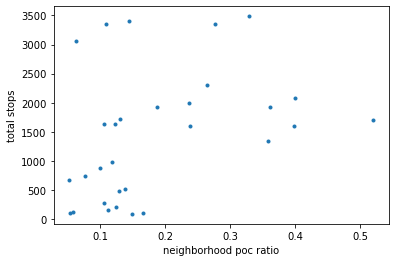

In [49]:
census_info_no_outliers = census_info_for_regression[census_info_for_regression['annualstops'] < 500]

plt.scatter(census_info_no_outliers['poccomp'], census_info_no_outliers['totalnumstops'], marker='.')
plt.xlabel('neighborhood poc ratio')
plt.ylabel('total stops');


test = census_info_no_outliers[['name10','totalpop','poccomp','totalnumstops','annualstops']].copy()
test.describe()
test.head()

In [50]:
df = pd.read_stata('C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\formatted_allstops_large(expanded).dta')  

In [55]:
df.head(2)
df.columns.values

,learecordid,incidentnumber,dateofstop,timeofstop,durationofstop,city,v9,raceperceivedpriortostop,perceivedraceorethnicity,perceivedgender,...,carsearch,distancefromcal,mm,yyyy,area_totalpop,area_medianincome,area_totalstops,area_annualstops,nonwhitecomp,perceivedage
0,BPD000021033,NaN,2020-10-01,11:14,8.0,Berkeley,-122.266571,True,Hispanic/Latino,Male,...,,1.2,10,2020,3118,71352.0,3486,436,0.378,30
1,BPD000021062,NaN,2020-10-02,15:21,7.0,Berkeley,-122.271172,True,Black/African American,Female,...,,1.4,10,2020,3118,71352.0,3486,436,0.378,27


array(['learecordid', 'incidentnumber', 'dateofstop', 'timeofstop',
       'durationofstop', 'city', 'v9', 'raceperceivedpriortostop',
       'perceivedraceorethnicity', 'perceivedgender', 'reasonforstop',
       'reasonforstopnarrative', 'resultofstop', 'personnumber',
       'isstopmadeinresponsetocallforser', 'informationbasedstop',
       'typeofstop', 'officertypeofassignment', 'location',
       'islocationak12publicschool', 'ifk12schoolisstopofastudent',
       'schoolname', 'educationcodesection', 'educationcodesubdivision',
       'perceivedgendernonconforming', 'islgbt',
       'personhadlimitedornoenglishfluen', 'perceivedorknowndisability',
       'cityofresidence', 'trafficviolationtype',
       'trafficviolationoffensecodes', 'suspicionoffensecode',
       'suspicionsubtype', 'actionstaken', 'basisforsearch',
       'basisforsearchnarrative', 'basisforpropertyseizure',
       'typeofpropertyseized', 'contrabandorevidence',
       'othercontrabanddesc', 'warningoffensecode

In [17]:
census_info_for_regression.to_csv('C:\\Users\\kharr\\Documents\\GitHub\\Berkeley-PD-ISF-110\\Data\\census_info_multilinear(with distance).csv')